<a href="https://colab.research.google.com/github/jiin124/4th_kaggle_study/blob/main/3%EC%A3%BC%EC%B0%A8/SVM_%EB%82%A0%EC%94%A8_%EB%B0%8F_%EC%9C%A0%EB%8F%99%EC%9D%B8%EA%B5%AC%EC%97%90_%EB%94%B0%EB%A5%B8_%EA%B5%90%ED%86%B5%EB%9F%89_%EC%B6%94%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/2021-ml-p2/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [3]:
!kaggle competitions download -c 2021-ml-p2

100% 811k/811k [00:00<00:00, 4.73MB/s]

  0% 0.00/964k [00:00<?, ?B/s]
100% 964k/964k [00:00<00:00, 93.7MB/s]
  0% 0.00/71.8k [00:00<?, ?B/s]
100% 71.8k/71.8k [00:00<00:00, 66.2MB/s]
  0% 0.00/139k [00:00<?, ?B/s]
100% 139k/139k [00:00<00:00, 94.9MB/s]


In [4]:
!unzip '*.zip'

Archive:  x_train.csv.zip
  inflating: x_train.csv             


In [5]:
X_train=pd.read_csv("x_train.csv",encoding='CP949')
y_train=pd.read_csv("y_train.csv",encoding='CP949')
X_test=pd.read_csv('x_test.csv',encoding='CP949')
sample=pd.read_csv("sample_submission.csv",encoding='CP949')

In [23]:
sample

,id,predict
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
10578,10578,0
10579,10579,0
10580,10580,0
10581,10581,0


In [6]:
X_train.head()

,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,월,일,년
0,0,26,76018.965,5009.811,36887.341,117916.117,40.467,21.667,17.75,0.0,2.725,9,25,2019
1,1,24,1232416.968,76043.955,451558.268,1760019.191,38.126,31.632,13.30,14.5,4.500,3,4,2018
2,1,23,134260.946,8412.761,78177.981,220851.688,51.107,45.643,5.25,0.5,4.950,4,7,2018
3,1,25,289327.429,39102.424,287029.303,615459.156,33.067,48.000,26.30,0.5,1.500,8,14,2019
4,1,7,1116617.660,96560.651,524905.301,1738083.612,40.392,26.961,8.40,44.0,4.300,12,1,2019


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21486 entries, 0 to 21485
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도명       21486 non-null  int64  
 1   읍면동명      21486 non-null  int64  
 2   거주인구      21486 non-null  float64
 3   근무인구      21486 non-null  float64
 4   방문인구      21486 non-null  float64
 5   총 유동인구    21486 non-null  float64
 6   평균 속도     21486 non-null  float64
 7   평균 소요 시간  21486 non-null  float64
 8   평균 기온     21486 non-null  float64
 9   일강수량      21486 non-null  float64
 10  평균 풍속     21486 non-null  float64
 11  월         21486 non-null  int64  
 12  일         21486 non-null  int64  
 13  년         21486 non-null  int64  
dtypes: float64(9), int64(5)
memory usage: 2.3 MB


In [ ]:
X_train.columns

Index(['시도명', '읍면동명', '거주인구', '근무인구', '방문인구', '총 유동인구', '평균 속도', '평균 소요 시간',
       '평균 기온', '일강수량', '평균 풍속', '월', '일', '년'],
      dtype='object')

In [ ]:
X_train.nunique()

시도명             2
읍면동명           41
거주인구        21483
근무인구        21482
방문인구        21486
총 유동인구      21486
평균 속도        4600
평균 소요 시간     5923
평균 기온        1690
일강수량          698
평균 풍속         558
월              12
일              31
년               3
dtype: int64

In [ ]:
col=X_train.columns
for i in col:
  print(X_train[i].value_counts())
  print("\n")

1    12815
0     8671
Name: 시도명, dtype: int64


18    572
9     571
32    565
24    562
31    552
26    550
39    547
10    546
22    546
16    545
13    545
36    544
30    544
25    543
23    543
34    542
21    535
0     535
35    534
28    534
20    534
1     533
12    533
3     532
27    532
7     531
2     530
19    530
14    529
8     528
4     526
5     526
17    525
40    523
15    521
33    520
6     519
37    516
38    515
11    513
29     15
Name: 읍면동명, dtype: int64


67920.708     2
70295.099     2
143719.637    2
31799.337     1
432106.526    1
             ..
473122.478    1
435358.886    1
268672.796    1
731614.660    1
75438.115     1
Name: 거주인구, Length: 21483, dtype: int64


17223.705     2
17184.108     2
25777.667     2
6276.255      2
14908.879     1
             ..
43956.251     1
18920.871     1
60317.643     1
155346.092    1
4125.073      1
Name: 근무인구, Length: 21482, dtype: int64


103783.810    1
576824.717    1
145950.798    1
177051.094    1
201120.794    1

거의 범주형 변수들은 라벨링이 되어있다. 

## EDA

In [7]:
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [8]:
X_train.columns

Index(['시도명', '읍면동명', '거주인구', '근무인구', '방문인구', '총 유동인구', '평균 속도', '평균 소요 시간',
       '평균 기온', '일강수량', '평균 풍속', '월', '일', '년'],
      dtype='object')

In [9]:
#데이터 시각화를 위해 X_train,y_trian 데이터 합치기
df=pd.concat([X_train,y_train],axis=1)
df

,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,평균 속도,평균 소요 시간,평균 기온,일강수량,평균 풍속,월,일,년,교통량
0,0,26,76018.965,5009.811,36887.341,117916.117,40.467,21.667,17.750,0.000,2.725,9,25,2019,0.000
1,1,24,1232416.968,76043.955,451558.268,1760019.191,38.126,31.632,13.300,14.500,4.500,3,4,2018,1532.989
2,1,23,134260.946,8412.761,78177.981,220851.688,51.107,45.643,5.250,0.500,4.950,4,7,2018,710.107
3,1,25,289327.429,39102.424,287029.303,615459.156,33.067,48.000,26.300,0.500,1.500,8,14,2019,374.200
4,1,7,1116617.660,96560.651,524905.301,1738083.612,40.392,26.961,8.400,44.000,4.300,12,1,2019,535.882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21481,0,6,91977.598,14802.819,79885.446,186665.863,41.676,21.676,6.400,0.000,1.600,3,5,2020,91.000
21482,0,9,63673.610,3725.663,65813.385,133212.658,48.737,26.105,18.300,7.000,3.700,5,26,2018,0.000
21483,1,3,406035.642,46335.550,258079.137,710450.329,49.314,50.943,-6.133,0.833,6.067,1,25,2018,0.000
21484,1,25,315737.894,25379.224,283079.548,624196.666,35.312,43.688,8.600,0.000,3.100,3,17,2019,283.625


### target값인 교통량 확인하기

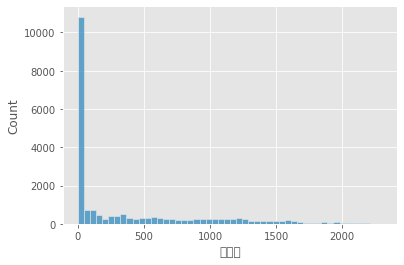

In [ ]:
sns.histplot(df,x='교통량')

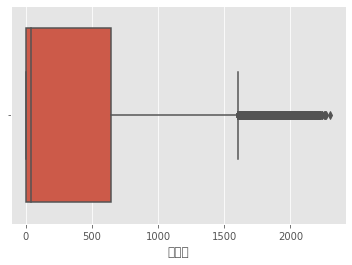

In [ ]:
sns.boxplot(data=df,x='교통량')

### 시도명

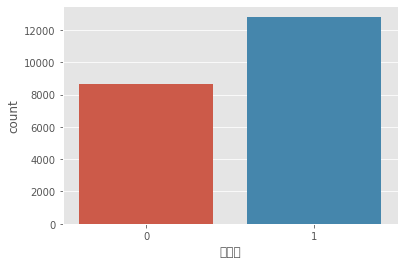

In [ ]:
sns.countplot(data=df,x='시도명')
#제주시, 서귀포시

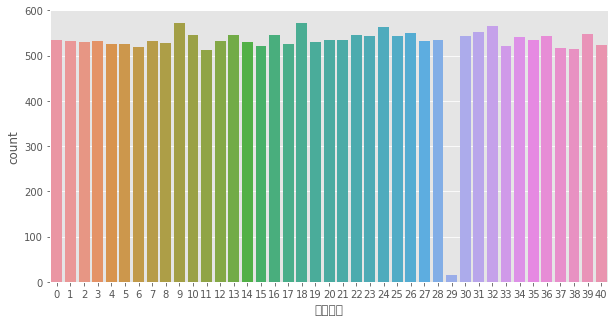

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='읍면동명')

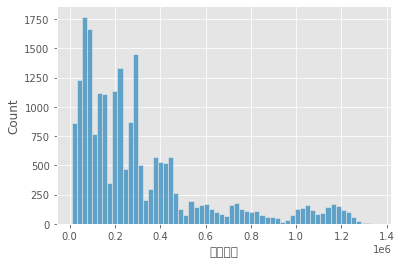

In [ ]:
sns.histplot(data=df,x='거주인구')

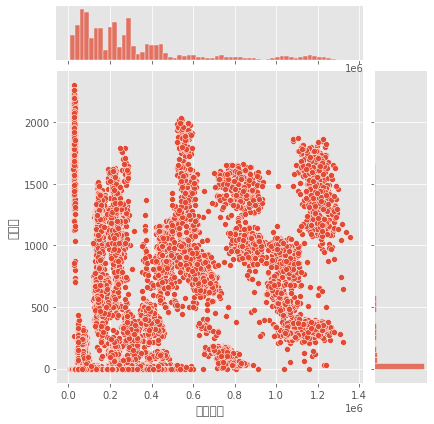

In [ ]:
sns.jointplot(data=df,x='거주인구',y='교통량')

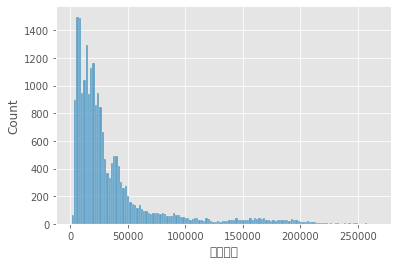

In [ ]:
sns.histplot(data=df,x='근무인구')

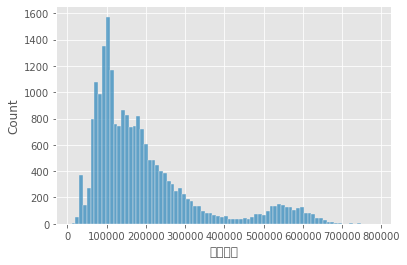

In [ ]:
sns.histplot(data=df,x='방문인구')

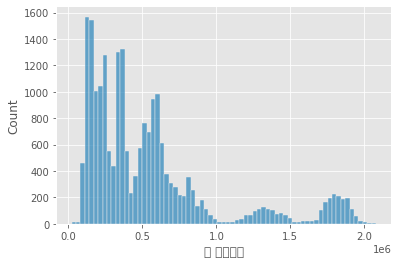

In [ ]:
sns.histplot(data=df,x='총 유동인구')

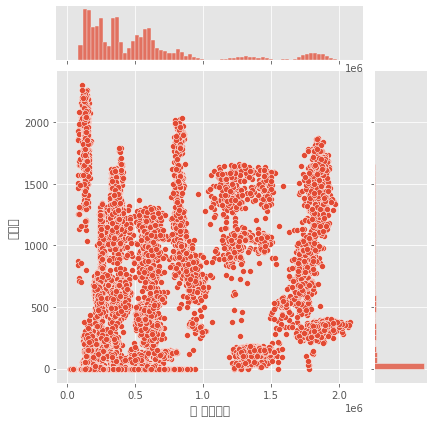

In [ ]:
sns.jointplot(data=df,x='총 유동인구',y='교통량')

'평균 속도', '평균 소요 시간',
       '평균 기온', '일강수량', '평균 풍속', '월', '일', '년'

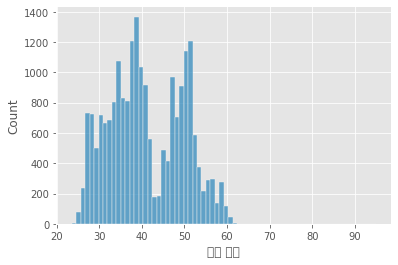

In [ ]:
sns.histplot(data=df,x='평균 속도')

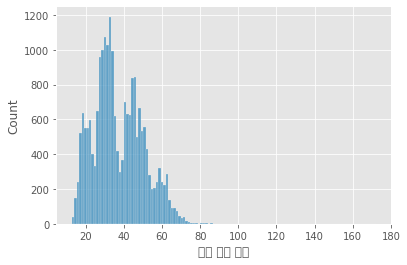

In [ ]:
sns.histplot(data=df,x='평균 소요 시간')

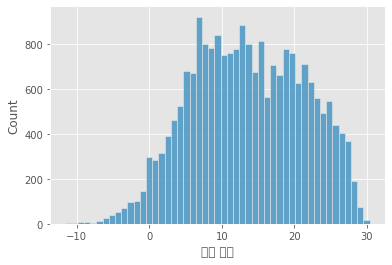

In [ ]:
sns.histplot(data=df,x='평균 기온')

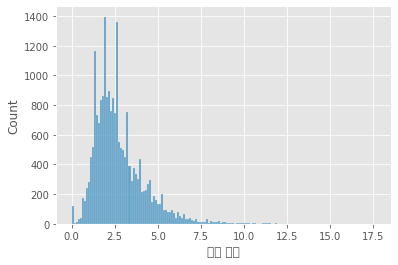

In [ ]:
sns.histplot(data=df,x='평균 풍속')


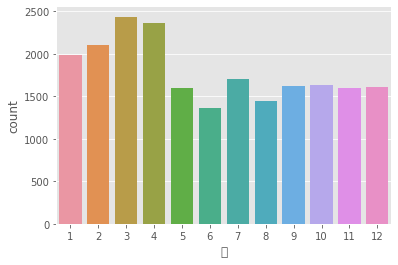

In [ ]:
sns.countplot(data=df,x='월')

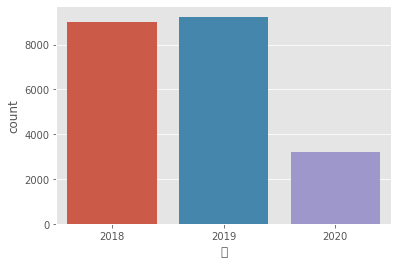

In [ ]:
sns.countplot(data=df,x='년')

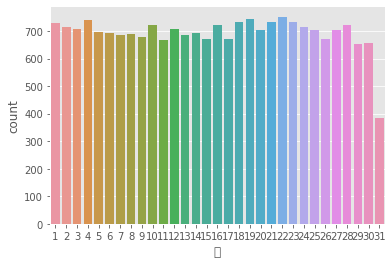

In [ ]:
sns.countplot(data=df,x='일')

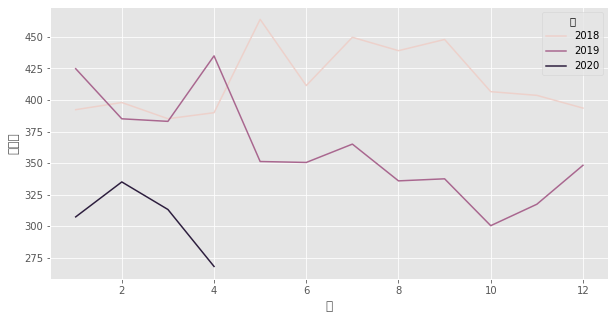

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='월',y='교통량',hue='년',legend='full',ci=None)

코로나 여파로 2020년은 교통량이 현저히 적은 것을 볼 수 있음 그리고 데이터 수집 기간이 2020년 4월 까지였나봄. 2018년이 가장 교통량이 많고 보통 4,5월에 교통량이 많다. 좋겠다 나도 제주도 여행가고 싶다. 

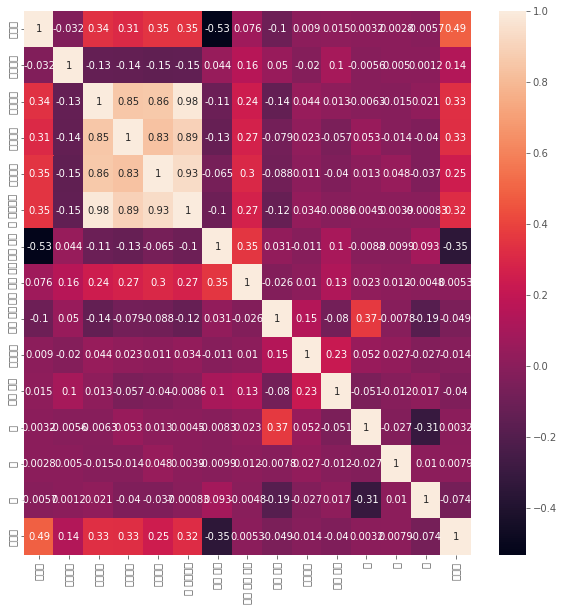

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
#개열받네 한글 출력이 안됨

## 스케일링

minmaxscaler를 사용할 예정

In [10]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()
scaled_train=ms.fit_transform(X_train)
scaled_test=ms.transform(X_test)



In [11]:
scaled_train=pd.DataFrame(scaled_train,columns=X_train.columns)
scaled_test=pd.DataFrame(scaled_test,columns=X_test.columns)

In [12]:
print(scaled_train.shape)
print(scaled_test.shape)
print(y_train.shape)

(21486, 14)
(10583, 14)
(21486, 1)


## 모델링

- randomforestregressor
- XGBoostregressor
- svm

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

### 서포트벡터머신


In [ ]:
svr=SVR(kernel='linear')
svr.fit(scaled_train,y_train)
svr_pred=svr.predict(scaled_test)


### RandomForest

3시간 넘게 걸림. 그냥 중단시켜버림

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

params={
    'n_estimators':[100,500,1000],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,12,16,20]
}

rf=RandomForestRegressor(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(scaled_train,y_train)

print("최적 하이퍼 파라미터: ",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 1000}
최고 예측 정확도 :  0.9664435480884467


In [ ]:
rf=RandomForestRegressor()
rf.fit(scaled_train,y_train)
pred=rf.predict(scaled_test)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values=rf_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("feature importances top20")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

In [ ]:
rf_submit=sample.copy()
rf_submit['교통량']=rf_pred
rf_submit.to_csv('rf.csv')

### XGBoost

In [ ]:
params={
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[100,300,500],
    'max_depth':[3,5,7],
    'sub_sample':[0.3,0.5,1],
    'colsample_bytree':[0.3,0.5,1]
}

xgb=XGBRegressor(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(xgb,param_grid=params,cv=3,n_jobs=-1)
grid_cv.fit(scaled_train,y_train)

print("최적 하이퍼 파라미터: ",grid_cv.best_params_)
print("최고 예측 정확도 : ",grid_cv.best_score_)

In [19]:
xgb=XGBRegressor(colsample_bytree=0.5, learning_rate= 0.05, max_depth= 5, 
                 n_estimators= 500, sub_sample= 0.3)
xgb.fit(scaled_train,y_train)
xgb_pred=xgb.predict(scaled_test)

[05:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [38]:
xgb_submit=sample.copy()
xgb_submit['predict']=xgb_pred
xgb_submit.to_csv('xgb1.csv',index=False)

In [37]:
xgb_submit

,id,predict
0,0,12.577192
1,1,28.674753
2,2,70.168549
3,3,1024.113525
4,4,1872.978882
...,...,...
10578,10578,20.448614
10579,10579,0.802781
10580,10580,45.737007
10581,10581,-11.575787


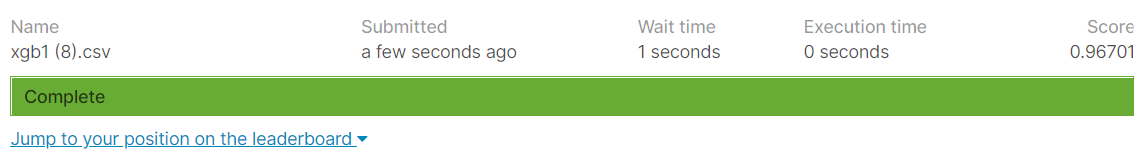